# Import Library

In [6]:
! pip install opencv-python
! pip install numpy
! pip install --upgrade matplotlib --ignore-installed six
! pip install mplot3d
! pip install scipy 
! python3 -c "import cv2"
import cv2
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.fft import fft, fftfreq, ifft, fft2, fftshift, ifft2
from scipy import signal

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
  Using cached matplotlib-3.5.1-cp310-cp310-macosx_11_0_arm64.whl (7.2 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-9.0.1-1-cp310-cp310-macosx_11_0_arm64.whl (2.7 MB)
  Using cached fonttools-4.29.1-py3-none-any.whl (895 kB)
  Using cached kiwisolver-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (59 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached numpy-1.22.2-cp310-cp310-macosx_11_0_arm64.whl (12.8 MB)
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)
You should consider upgrading via the '/Library/Frameworks/Python.framew

# Define Variable

# Define Function

In [7]:
def generateSineWave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

def generateCosineWave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.cos takes radians
    y = np.cos((2 * np.pi) * frequencies)
    return x, y

def generateStepSignal(N1, N2, N, signalValue = 1):
    x = np.arange(N1,N2,1)
    y = []
    for pos,val in enumerate(x):
        y.append((0 if val <N else signalValue))

    return x,y

def generateImpulseSignal(nSamples):
    x = np.arange(0, nSamples,1)
    y = signal.unit_impulse(nSamples)
    return x,y


def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Main Work

## B.1

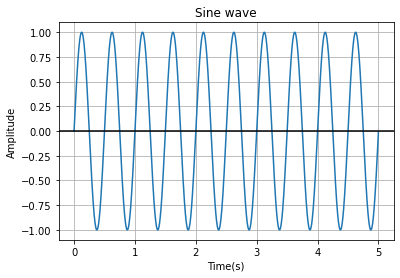

In [8]:
SAMPLE_RATE = 1000  # Hertz
DURATION = 5  # Seconds
FREQUENCY = 2

x, y = generateSineWave(FREQUENCY, SAMPLE_RATE, DURATION)

# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(x, y)
# Give a title for the sine wave plot
plt.title('Sine wave')
# Give x axis label for the sine wave plot
plt.xlabel('Time(s)')
# Give y axis label for the sine wave plot
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
# Display the sine wave
plt.show()

## B.2

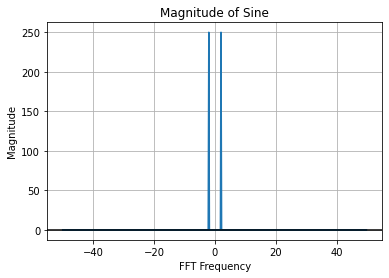

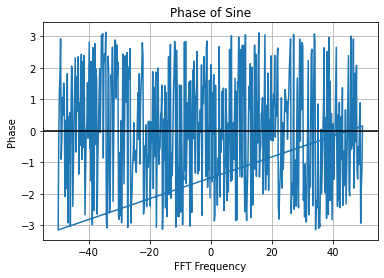

[2.01948392e-31-5.04870979e-32j 2.48689887e-01+7.57306469e-32j
 4.81753674e-01-5.68434189e-17j 6.84547106e-01-2.52435490e-31j
 8.44327926e-01-5.68434189e-17j 9.51056516e-01-8.52651283e-17j
 9.98026728e-01-8.52651283e-17j 9.82287251e-01+9.94759830e-17j
 9.04827052e-01-2.84217094e-17j 7.70513243e-01-1.13686838e-16j]


In [9]:
SAMPLE_RATE = 100  # Hertz
DURATION = 5  # Seconds
FREQUENCY = 2

time, amplitude = generateSineWave(FREQUENCY, SAMPLE_RATE, DURATION)
# Calculate FFT of Sine wave
fft_sine = fft(amplitude)

#For Absolute
x,y = fftfreq(SAMPLE_RATE*DURATION, 1/SAMPLE_RATE), np.abs(fft_sine)
plt.plot(x,y)
# Give a title for the sine wave plot
plt.title('Magnitude of Sine')
# Give x axis label for the sine wave plot
plt.xlabel('FFT Frequency')
# Give y axis label for the sine wave plot
plt.ylabel('Magnitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
# Display the sine wave
plt.show()


#For Phase
x,y = fftfreq(SAMPLE_RATE*DURATION, 1/SAMPLE_RATE), np.angle(fft_sine)
plt.plot(x,y)
# Give a title for the sine wave plot
plt.title('Phase of Sine')
# Give x axis label for the sine wave plot
plt.xlabel('FFT Frequency')
# Give y axis label for the sine wave plot
plt.ylabel('Phase')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
# Display the sine wave
plt.show()



SAMPLE_RATE = 100  # Hertz
DURATION = 5  # Seconds
FREQUENCY = 4

time, amplitude = generateSineWave(FREQUENCY, SAMPLE_RATE, DURATION)
# Calculate FFT of Sine wave
fft_sine = fft(amplitude)

new_amplitude = ifft(fft_sine)
print(new_amplitude[0:10])

## B.3

### a) Cosine

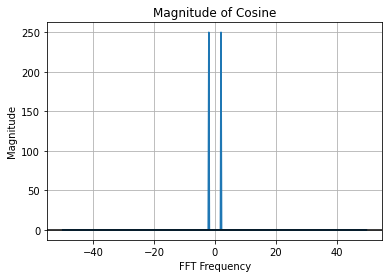

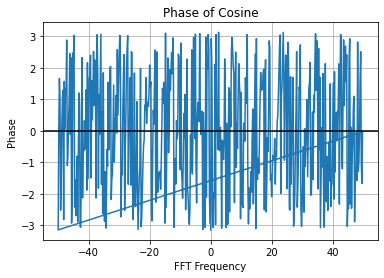

[ 1.        +3.02922588e-31j  0.96858316-4.26325641e-17j
  0.87630668+2.84217094e-17j  0.72896863+1.13686838e-16j
  0.53582679+5.68434189e-17j  0.30901699+5.68434189e-17j
  0.06279052+1.70530257e-16j -0.18738131+7.10528818e-31j
 -0.42577929+5.68434189e-17j -0.63742399+3.28166137e-31j]


In [10]:
SAMPLE_RATE = 100  # Hertz
DURATION = 5  # Seconds
FREQUENCY = 2

time, amplitude = generateCosineWave(FREQUENCY, SAMPLE_RATE, DURATION)
# Calculate FFT of Cosine wave
fft_cosine = fft(amplitude)

#For Absolute
x,y = fftfreq(SAMPLE_RATE*DURATION, 1/SAMPLE_RATE), np.abs(fft_cosine)
plt.plot(x,y)
# Give a title for the Cosine wave plot
plt.title('Magnitude of Cosine')
# Give x axis label for the Cosine wave plot
plt.xlabel('FFT Frequency')
# Give y axis label for the Cosine wave plot
plt.ylabel('Magnitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
# Display the Cosine wave
plt.show()


#For Phase
x,y = fftfreq(SAMPLE_RATE*DURATION, 1/SAMPLE_RATE), np.angle(fft_cosine)
plt.plot(x,y)
# Give a title for the Cosine wave plot
plt.title('Phase of Cosine')
# Give x axis label for the Cosine wave plot
plt.xlabel('FFT Frequency')
# Give y axis label for the Cosine wave plot
plt.ylabel('Phase')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
# Display the Cosine wave
plt.show()



SAMPLE_RATE = 100  # Hertz
DURATION = 5  # Seconds
FREQUENCY = 4

time, amplitude = generateCosineWave(FREQUENCY, SAMPLE_RATE, DURATION)
# Calculate FFT of Cosine wave
fft_sine = fft(amplitude)

new_amplitude = ifft(fft_sine)
print(new_amplitude[0:10])

### b) Step Signal

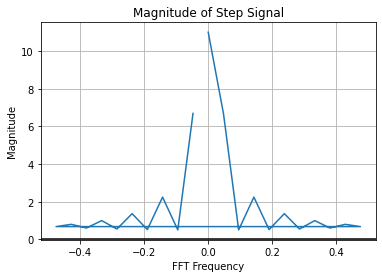

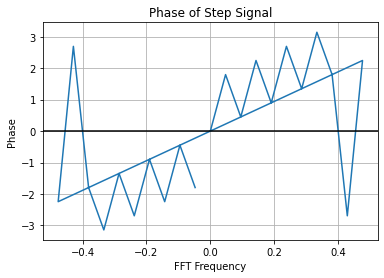

[-5.73018335e-16+0.j -1.14603667e-16+0.j  0.00000000e+00+0.j
 -2.29207334e-16+0.j  0.00000000e+00+0.j -6.87622002e-16+0.j
  0.00000000e+00+0.j -2.29207334e-16+0.j -2.29207334e-16+0.j
  3.43811001e-16+0.j]


In [11]:
N1 = -10 
N2 = 11  
N = 0
magnitudeSignal = 1

time, amplitude = generateStepSignal(N1, N2, N, magnitudeSignal )
# Calculate FFT of StepSignal wave
fft_stepSignal = fft(amplitude)

#For Absolute
x,y = fftfreq(N2-N1,1), np.abs(fft_stepSignal)
plt.plot(x, y)
# Give a title for the StepSignal wave plot
plt.title('Magnitude of Step Signal')
# Give x axis label for the StepSignal wave plot
plt.xlabel('FFT Frequency')
# Give y axis label for the StepSignal wave plot
plt.ylabel('Magnitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
# Display the StepSignal wave
plt.show()


#For Phase
x,y = fftfreq(N2-N1,1), np.angle(fft_stepSignal)
plt.plot(x,y)
# Give a title for the StepSignal wave plot
plt.title('Phase of Step Signal')
# Give x axis label for the StepSignal wave plot
plt.xlabel('FFT Frequency')
# Give y axis label for the StepSignal wave plot
plt.ylabel('Phase')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
# Display the StepSignal wave
plt.show()



N1 = -15 
N2 = 16  
N = 1
magnitudeSignal = 2

time, amplitude = generateStepSignal(N1, N2, N, magnitudeSignal)
# Calculate FFT of StepSignal wave
fft_sine = fft(amplitude)

new_amplitude = ifft(fft_sine)
print(new_amplitude[0:10])

### c) Impulse Signal

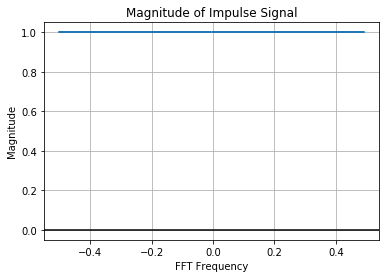

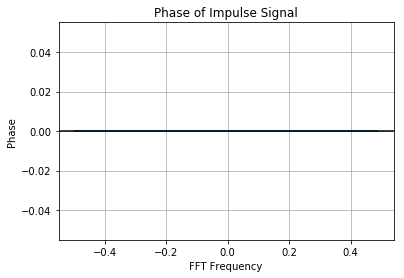

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [8]:
N_SAMPLES = 100

time, amplitude = generateImpulseSignal(N_SAMPLES)
# Calculate FFT of Impulse wave
fft_stepSignal = fft(amplitude)

#For Absolute
x,y = fftfreq(N_SAMPLES,1), np.abs(fft_stepSignal)
plt.plot(x, y)
# Give a title for the Impulse wave plot
plt.title('Magnitude of Impulse Signal')
# Give x axis label for the Impulse wave plot
plt.xlabel('FFT Frequency')
# Give y axis label for the Impulse wave plot
plt.ylabel('Magnitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
# Display the Impulse wave
plt.show()


#For Phase
x,y = fftfreq(N_SAMPLES,1), np.angle(fft_stepSignal)
plt.plot(x,y)
# Give a title for the Impulse wave plot
plt.title('Phase of Impulse Signal')
# Give x axis label for the Impulse wave plot
plt.xlabel('FFT Frequency')
# Give y axis label for the Impulse wave plot
plt.ylabel('Phase')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
# Display the Impulse wave
plt.show()


N_SAMPLES = 200

time, amplitude = generateImpulseSignal(N_SAMPLES)
# Calculate FFT of StepSignal wave
fft_sine = fft(amplitude)

new_amplitude = ifft(fft_sine)
print(new_amplitude[0:10])

## B.4a

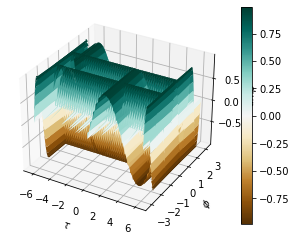

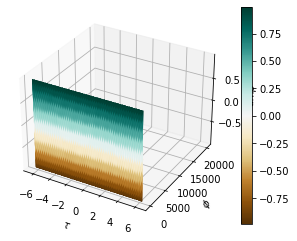

In [12]:
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
FREQUENCY = 1

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-2*np.pi, 2*np.pi, 200)
ys = np.linspace(-2*np.pi, 2*np.pi, 200)
tau, phi = np.meshgrid(xs*FREQUENCY, ys*FREQUENCY) 
# Z evaluation
amp = np.sin(tau+phi) 
fft2_amp = fft2(amp)
ax3d.set_xlabel(r'$\tau$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$\phi$')  # phi -> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.angle(fft2_amp), amp ,cmap=cm.BrBG)
fig.colorbar(surf)


fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
FREQUENCY = 1

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-2*np.pi, 2*np.pi, 200)
ys = np.linspace(-2*np.pi, 2*np.pi, 200)
tau, phi = np.meshgrid(xs*FREQUENCY, ys*FREQUENCY) 
# Z evaluation
amp = np.sin(tau+phi) 

ax3d.set_xlabel(r'$\tau$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$\phi$')  # phi -> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.abs(fft2_amp), amp ,cmap=cm.BrBG)
fig.colorbar(surf)

## B.4b

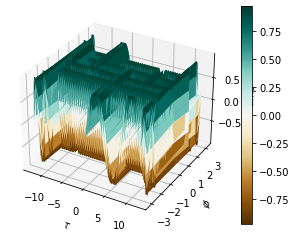

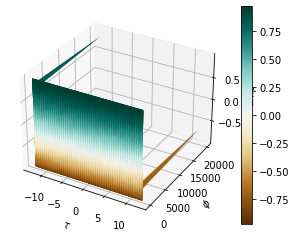

In [18]:
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
FREQUENCY = 2

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-2*np.pi, 2*np.pi, 200)
ys = np.linspace(-2*np.pi, 2*np.pi, 200)
tau, phi = np.meshgrid(xs*FREQUENCY, ys*FREQUENCY) 
# Z evaluation
amp = np.sin(tau+phi) 
fft2_amp = fft2(amp)
ax3d.set_xlabel(r'$\tau$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$\phi$')  # phi -> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.angle(fft2_amp), amp ,cmap=cm.BrBG)
fig.colorbar(surf)


fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
FREQUENCY = 2

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(-2*np.pi, 2*np.pi, 200)
ys = np.linspace(-2*np.pi, 2*np.pi, 200)
tau, phi = np.meshgrid(xs*FREQUENCY, ys*FREQUENCY) 
# Z evaluation
amp = np.sin(tau+phi) 

ax3d.set_xlabel(r'$\tau$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$\phi$')  # phi -> phase
ax3d.set_zlabel(r'$amp$')   # signal amplitude

surf = ax3d.plot_surface(tau, np.abs(fft2_amp), amp ,cmap=cm.BrBG)
fig.colorbar(surf)

## B.6

[[-0.          1.75779936 -0.6363957  ... -1.93022977  0.6363957
  -1.75779936]
 [-1.59357685  2.35580492  3.06762046 ...  0.89559744  2.23910769
   1.53163557]
 [-2.78975233 -2.69355572 -0.5990701  ...  1.20697907 -2.90400793
  -0.07813194]
 ...
 [-0.30284948  1.73588423  1.0269175  ...  2.19010884 -1.41693918
  -2.02447523]
 [ 3.04647963 -0.43899999  1.88032956 ...  1.8532936  -2.71873154
  -0.20195546]
 [-1.10429155 -2.99386502  0.03639389 ... -1.72878566  0.43885864
   2.63751282]]


/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/1233095898.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(fft_img_lena)), cmap='gray')
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/1233095898.py:9: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(fft_img_lena)), cmap='gray')
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/1233095898.py:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(fftshift_)), cmap='gray')
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/1233095898.py:17: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(fftshift_)), cmap='gray')


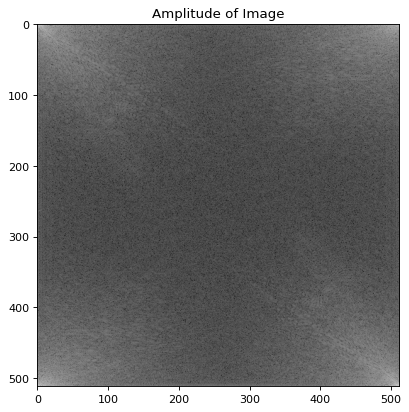

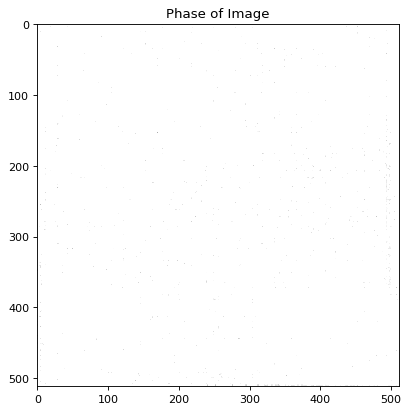

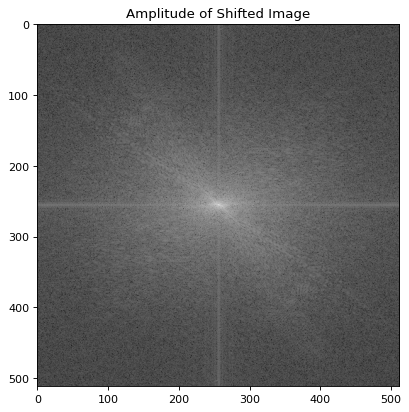

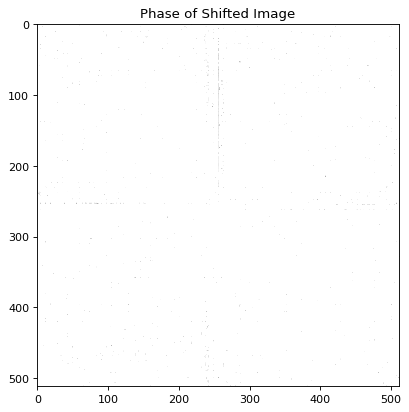

In [14]:
img_lena = cv2.imread('lenaG.bmp',cv2.IMREAD_GRAYSCALE)
fft_img_lena = fft2(img_lena)
print(np.angle(fft_img_lena)[:10])
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Amplitude of Image')
plt.imshow(np.log(np.abs(fft_img_lena)), cmap='gray')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Phase of Image')
plt.imshow(np.log(np.angle(fft_img_lena)), cmap='gray')

fftshift_ = fftshift(fft_img_lena)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Amplitude of Shifted Image')
plt.imshow(np.log(np.abs(fftshift_)), cmap='gray')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Phase of Shifted Image')
plt.imshow(np.log(np.angle(fftshift_)), cmap='gray')

## B.7

/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/1913637516.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(ifft_img_lena)), cmap='gray')
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/1913637516.py:8: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(ifft_img_lena)), cmap='gray')


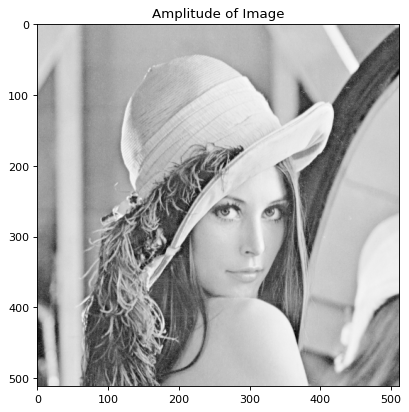

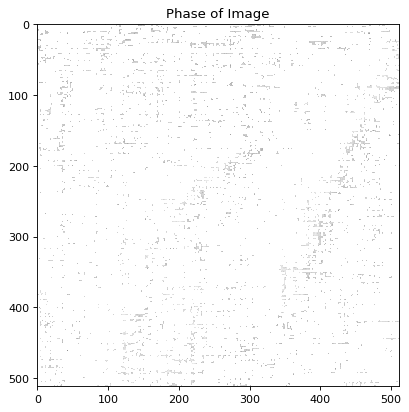

In [15]:
ifft_img_lena = ifft2(fft_img_lena)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Amplitude of Image')
plt.imshow(np.log(np.abs(ifft_img_lena)), cmap='gray')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Phase of Image')
plt.imshow(np.log(np.angle(ifft_img_lena)), cmap='gray')


## B.8

/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/1701292359.py:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(ifft_img_lena)), cmap='gray')
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/1701292359.py:10: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(ifft_img_lena)), cmap='gray')


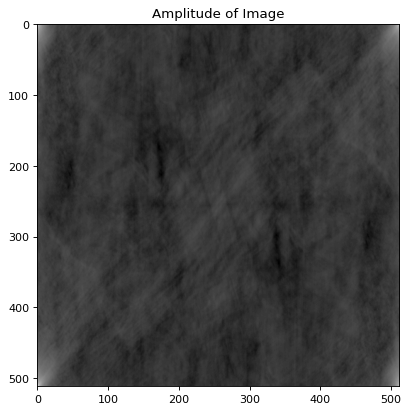

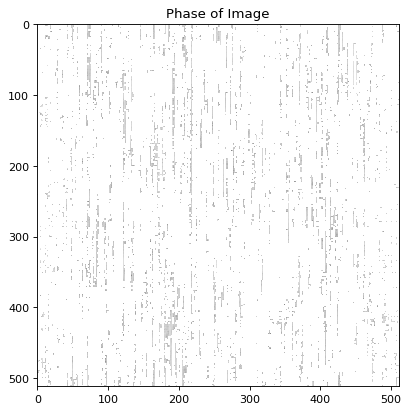

In [16]:
img_lena = cv2.imread('lenaG.bmp',cv2.IMREAD_GRAYSCALE)
fft_img_lena = fft2(img_lena)
ifft_img_lena = ifft2(np.abs(fft_img_lena))

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Amplitude of Image')
plt.imshow(np.log(np.abs(ifft_img_lena)), cmap='gray')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Phase of Image')
plt.imshow(np.log(np.angle(ifft_img_lena)), cmap='gray')

## B.9

In [142]:
np.add(imagina_fft_img_lena,np.full(fft_img_lena.shape,1))

array([[ 1.00000000e+00,  2.39684895e+06, -1.13828814e+06, ...,
        -6.34263793e+05,  1.13829014e+06, -2.39684695e+06],
       [-1.22752740e+06,  1.59538677e+06,  8.21592643e+04, ...,
         8.13493898e+05,  4.50222633e+05,  9.45814170e+05],
       [-1.64857949e+05, -1.32292924e+05, -4.56441888e+05, ...,
         9.27373851e+05, -1.75502345e+05, -6.43260536e+04],
       ...,
       [-2.14431216e+05,  7.09259227e+05, -2.01645199e+05, ...,
         1.15814671e+05, -6.80617229e+05,  6.05201823e+05],
       [ 1.64859949e+05,  6.43280536e+04,  1.75504345e+05, ...,
        -7.56793889e+05,  4.56443888e+05,  1.32294924e+05],
       [ 1.22752940e+06, -9.45812170e+05, -4.50220633e+05, ...,
         1.90490441e+06, -8.21572643e+04, -1.59538477e+06]])

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


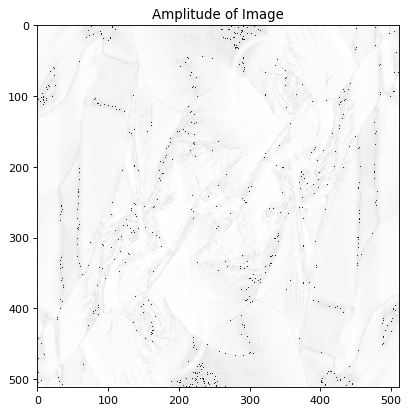

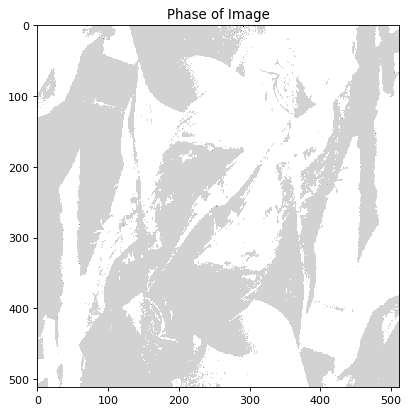

In [147]:
img_lena = cv2.imread('lenaG.bmp',cv2.IMREAD_GRAYSCALE)
fft_img_lena = fft2(img_lena)
imagina_fft_img_lena = fft_img_lena.imag
ifft_img_lena = ifft2(np.add(imagina_fft_img_lena,np.full(fft_img_lena.shape,1)))

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Amplitude of Image')
plt.imshow(np.log(np.abs(ifft_img_lena)), cmap='gray')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Phase of Image')
plt.imshow(np.log(np.angle(ifft_img_lena)), cmap='gray')

## B.10

/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/3480921914.py:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(fft_img_lena)), cmap='gray')
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/3480921914.py:9: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(fft_img_lena)), cmap='gray')
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/3480921914.py:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.angle(fftshift_)), cmap='gray')
/var/folders/_7/46q3_5nn2371g0gn0hwyjc740000gn/T/ipykernel_27843/3480921914.py:17: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.angle(fftshift_)), cmap='gray')


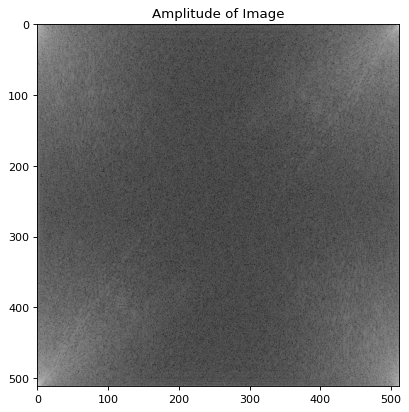

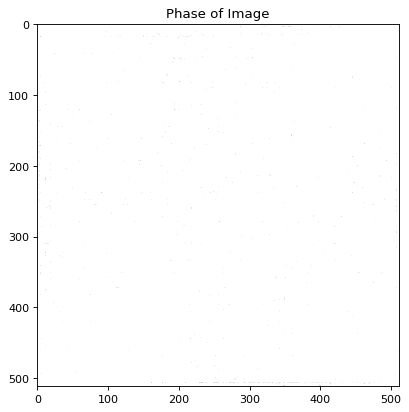

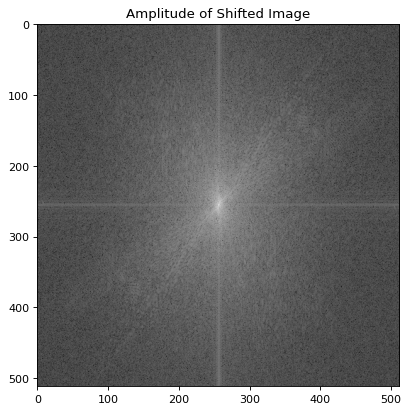

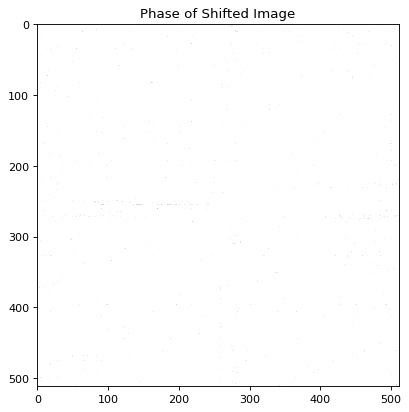

In [17]:
img_lena = cv2.imread('lenaG.bmp',cv2.IMREAD_GRAYSCALE)
img_lena = np.rot90(img_lena)
fft_img_lena = fft2(img_lena)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Amplitude of Image')
plt.imshow(np.log(np.abs(fft_img_lena)), cmap='gray')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Phase of Image')
plt.imshow(np.log(np.angle(fft_img_lena)), cmap='gray')

fftshift_ = fftshift(fft_img_lena)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Amplitude of Shifted Image')
plt.imshow(np.log(np.abs(fftshift_)), cmap='gray')
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title('Phase of Shifted Image')
plt.imshow(np.log(np.angle(fftshift_)), cmap='gray')